# Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.  

# Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

# Data fields

Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


# -----------------------------------------------------------------------------------------------------

# Importation dataset

# -----------------------------------------------------------------------------------------------------

In [1]:
from collections import Counter
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor,RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, LassoLars, LassoLarsCV, MultiTaskLasso, MultiTaskLassoCV, ElasticNet, ElasticNetCV, MultiTaskElasticNet, MultiTaskElasticNetCV, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor, TheilSenRegressor, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer, RobustScaler, MinMaxScaler
from xgboost import XGBRegressor

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)

In [2]:
base_path = os.path.join('../input/train.csv')
base_path

'../input/train.csv'

In [3]:
df = pd.read_csv(base_path)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Check NaN in df:

In [6]:
for col in df.columns:
    diff = df[col].isnull().sum()
    if diff != 0:
        print('missing values for {}: {}'.format(col, diff))

missing values for LotFrontage: 259
missing values for Alley: 1369
missing values for MasVnrType: 8
missing values for MasVnrArea: 8
missing values for BsmtQual: 37
missing values for BsmtCond: 37
missing values for BsmtExposure: 38
missing values for BsmtFinType1: 37
missing values for BsmtFinType2: 38
missing values for Electrical: 1
missing values for FireplaceQu: 690
missing values for GarageType: 81
missing values for GarageYrBlt: 81
missing values for GarageFinish: 81
missing values for GarageQual: 81
missing values for GarageCond: 81
missing values for PoolQC: 1453
missing values for Fence: 1179
missing values for MiscFeature: 1406


# Missing values

In [7]:
def fill_missings(df):
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    df['Alley'] = df['Alley'].fillna('Unknown')
    df['MasVnrType'] = df['MasVnrType'].fillna('Unknown')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
    df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
    df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
    df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unknown')
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    df['FireplaceQu'] = df['FireplaceQu'].fillna('Unknown')
    df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
    df['GarageFinish'] = df['GarageFinish'].fillna('Unknown')
    df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
    df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
    df['PoolQC'] = df['PoolQC'].fillna('Unknown')
    df['Fence'] = df['Fence'].fillna('Unknown')
    df['MiscFeature'] = df['MiscFeature'].fillna('Unknown')
    return df

    res['PoolQC'] = res['PoolQC'].fillna(res['PoolQC'].mode()[0])
    res['MasVnrType'] = res['MasVnrType'].fillna('None')
    res['FireplaceQu'] = res['FireplaceQu'].fillna(res['FireplaceQu'].mode()[0])
    res['GarageType'] = res['GarageType'].fillna('missing')
    res['GarageFinish'] = res['GarageFinish'].fillna(res['GarageFinish'].mode()[0])
    res['GarageCond'] = res['GarageCond'].fillna('missing')
    res['BsmtFinType2'] = res['BsmtFinType2'].fillna('missing')  
    
    res['Street'] = res['Street'].fillna('missing')
    res['LotShape'] = res['LotShape'].fillna('missing')
    res['LandContour'] = res['LandContour'].fillna('missing')
    res['CentralAir'] = res['CentralAir'].fillna('missing')
    res['MSZoning'] = res['MSZoning'].fillna(res['MSZoning'].mode()[0])    
    res['Utilities'] = res['Utilities'].fillna('missing')
    res['Exterior1st'] = res['Exterior1st'].fillna(res['Exterior1st'].mode()[0])
    res['Exterior2nd'] = res['Exterior2nd'].fillna(res['Exterior2nd'].mode()[0])    
    res['KitchenQual'] = res['KitchenQual'].fillna(res['KitchenQual'].mode()[0])
    res["Functional"] = res["Functional"].fillna("Typ")
    res['SaleType'] = res['SaleType'].fillna(res['SaleType'].mode()[0])
    res['SaleCondition'] = res['SaleCondition'].fillna('missing')

In [8]:
df = fill_missings(df)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Unknown,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [10]:
df.shape

(1460, 81)

# -----------------------------------------------------------------------------------------------------

# Remove outliers

# -----------------------------------------------------------------------------------------------------

In [11]:
df.set_index('Id', inplace=True)

In [12]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [13]:
df_num = df[['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
             'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
             'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalSF']]

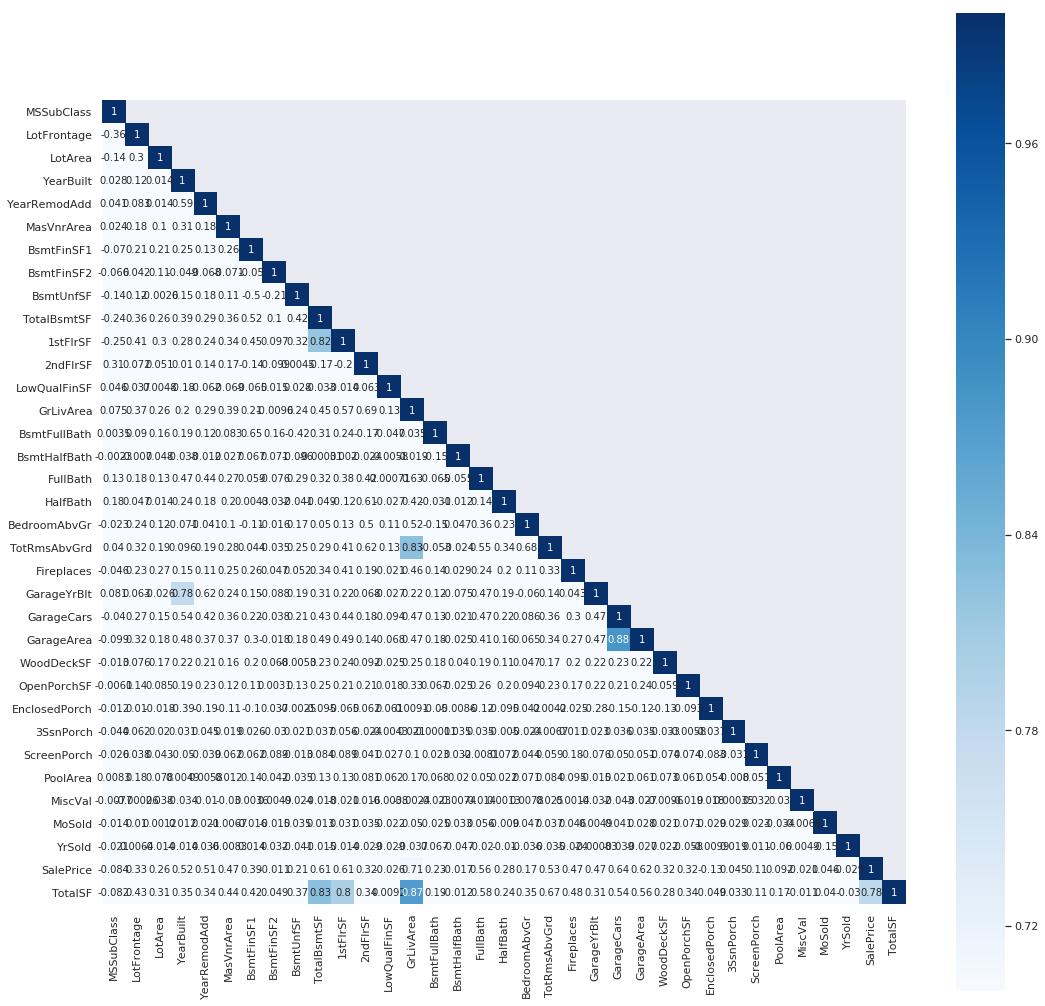

In [14]:
cor_mat = df_num[:].corr(method='pearson')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(18, 18)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True, cmap='Blues', vmin=0.7);

**We'll keep only the correlation > 0.7 between SalePrice and others features.**

### SalePrice

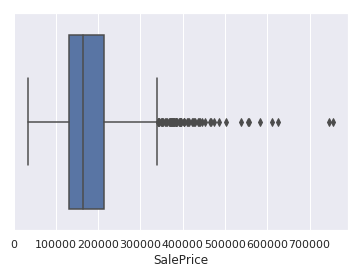

In [15]:
sns.boxplot(df_num['SalePrice']);

In [16]:
df_num.loc[df_num['SalePrice'] > 600000]

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
692,60,104.0,21535,1994,1995,1170.0,1455,0,989,2444,2444,1872,0,4316,0,1,3,1,4,10,2,1994.0,3,832,382,50,0,0,0,0,0,1,2007,755000,6760
899,20,100.0,12919,2009,2010,760.0,2188,0,142,2330,2364,0,0,2364,1,0,2,1,2,11,2,2009.0,3,820,0,67,0,0,0,0,0,3,2010,611657,4694
1170,60,118.0,35760,1995,1996,1378.0,1387,0,543,1930,1831,1796,0,3627,1,0,3,1,4,10,1,1995.0,3,807,361,76,0,0,0,0,0,7,2006,625000,5557
1183,60,160.0,15623,1996,1996,0.0,2096,0,300,2396,2411,2065,0,4476,1,0,3,1,4,10,2,1996.0,3,813,171,78,0,0,0,555,0,7,2007,745000,6872


### TotalSF=0.78

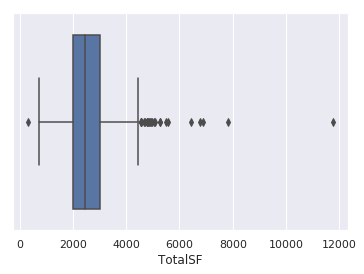

In [17]:
sns.boxplot(df_num['TotalSF']);

In [18]:
df_num.loc[df_num['TotalSF'] > 6000]

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
497,20,69.0,12692,1992,1993,0.0,1231,0,1969,3200,3228,0,0,3228,1,0,3,0,4,10,1,1992.0,2,546,264,75,291,0,0,0,0,5,2007,430000,6428
524,60,130.0,40094,2007,2008,762.0,2260,0,878,3138,3138,1538,0,4676,1,0,3,1,3,11,1,2007.0,3,884,208,406,0,0,0,0,0,10,2007,184750,7814
692,60,104.0,21535,1994,1995,1170.0,1455,0,989,2444,2444,1872,0,4316,0,1,3,1,4,10,2,1994.0,3,832,382,50,0,0,0,0,0,1,2007,755000,6760
1183,60,160.0,15623,1996,1996,0.0,2096,0,300,2396,2411,2065,0,4476,1,0,3,1,4,10,2,1996.0,3,813,171,78,0,0,0,555,0,7,2007,745000,6872
1299,60,313.0,63887,2008,2008,796.0,5644,0,466,6110,4692,950,0,5642,2,0,2,1,3,12,3,2008.0,2,1418,214,292,0,0,0,480,0,1,2008,160000,11752


### Find the Id in common

In [19]:
common_id = [692, 899, 1170, 1183, 497, 524, 692, 1183, 1299]

In [20]:
Counter(common_id)

Counter({692: 2, 899: 1, 1170: 1, 1183: 2, 497: 1, 524: 1, 1299: 1})

**Most common values: 692, 1183.**

In [21]:
Id_to_drop = [692, 1183]

In [22]:
df.drop(Id_to_drop, inplace=True)

In [23]:
df.reset_index(drop=True, inplace=True)

In [24]:
df.shape

(1458, 81)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Unknown,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000,3343


In [26]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.893004,69.778464,10505.768861,6.093964,5.575446,1971.235254,1984.851166,102.456104,441.812757,46.613169,567.134431,1055.560357,1160.891632,344.768176,5.852538,1511.512346,0.425240,0.056927,1.563100,0.38203,2.864883,1.046639,6.513032,0.611111,1978.566529,1.765432,472.500686,93.994513,46.636488,21.984225,3.414266,15.081619,2.382030,43.548697,6.325103,2007.816872,180140.566529,2561.220165
std,42.329437,21.897519,9983.038856,1.376369,1.113405,30.210793,20.655801,178.660880,453.576611,161.420729,441.976586,436.089145,383.999581,432.656605,48.655960,514.873223,0.518929,0.237632,0.548721,0.50271,0.815255,0.220483,1.621377,0.643056,24.005748,0.746430,213.558452,125.181630,66.296340,61.155666,29.337173,55.792877,37.509607,496.460799,2.701826,1.328662,76645.846478,807.044783
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,334.000000
25%,20.000000,60.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.250000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,331.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000,2008.500000
50%,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,477.500000,991.000000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.00000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,479.500000,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,2473.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.000000,711.000000,0.000000,808.000000,1296.750000,1390.750000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.00000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213875.000000,3002.250000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,1818.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.00000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000,11752.000000


# -----------------------------------------------------------------------------------------------------

# Feature Engineering - PowerTransformer on SalePrice feature

# -----------------------------------------------------------------------------------------------------

In [27]:
pt = PowerTransformer()

In [28]:
salePrice_PowTransf = pt.fit_transform(df['SalePrice'].values.reshape(-1, 1))

In [29]:
df['salePrice_PowTransf'] = salePrice_PowTransf

In [30]:
df['salePrice_PowTransf'] = df['salePrice_PowTransf'] + 1 + np.absolute(df['salePrice_PowTransf'].min())

In [31]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,salePrice_PowTransf
0,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Unknown,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500,2566,5.652718
1,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500,2524,5.304499
2,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500,2706,5.826369
3,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000,2473,4.646977
4,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000,3343,6.105344


# -----------------------------------------------------------------------------------------------------

# Feature Engineering - Quantiles

# -----------------------------------------------------------------------------------------------------

In [32]:
df_num = df[['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
            'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
            'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
            '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF']]

In [33]:
# quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
# df_num['LotFrontage_quantile_range'] = pd.qcut(df_num['LotFrontage'], q=4, duplicates='drop')
# df_num['LotFrontage_quantile_label'] = pd.qcut(df_num['LotFrontage'], q=4, labels=quantile_labels, 
#                                               duplicates='drop')
# df_num['LotFrontage_quantile'] = df_num['LotFrontage_quantile_label'].astype('category', ordered=True,
#                                                                            categories=quantile_labels).cat.codes

In [34]:
# quantile_labels = ['0-50Q', '50-75Q', '75-100Q']
# df_num['MSSubClass_quantile_range'] = pd.qcut(df_num['MSSubClass'], q=4, duplicates='drop')
# df_num['MSSubClass_quantile_label'] = pd.qcut(df_num['MSSubClass'], q=4, labels=quantile_labels, duplicates='drop')
# df_num['MSSubClass_quantile'] = df_num['MSSubClass_quantile_label'].astype('category', ordered=True,
#                                                                            categories=quantile_labels).cat.codes

In [35]:
# quantile_labels = ['0-75Q', '75-100Q']
# df_num['MasVnrArea_quantile_range'] = pd.qcut(df_num['MasVnrArea'], q=4, duplicates='drop')
# df_num['MasVnrArea_quantile_label'] = pd.qcut(df_num['MasVnrArea'], q=4, labels=quantile_labels, duplicates='drop')
# df_num['MasVnrArea_quantile'] = df_num['MasVnrArea_quantile_label'].astype('category', ordered=True,
#                                                                            categories=quantile_labels).cat.codes

In [36]:
df_num.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.893004,69.778464,10505.768861,1971.235254,1984.851166,102.456104,441.812757,46.613169,567.134431,1055.560357,1160.891632,344.768176,5.852538,1511.512346,0.425240,0.056927,1.563100,0.38203,2.864883,1.046639,6.513032,0.611111,1978.566529,1.765432,472.500686,93.994513,46.636488,21.984225,3.414266,15.081619,2.382030,43.548697,6.325103,2007.816872,2561.220165
std,42.329437,21.897519,9983.038856,30.210793,20.655801,178.660880,453.576611,161.420729,441.976586,436.089145,383.999581,432.656605,48.655960,514.873223,0.518929,0.237632,0.548721,0.50271,0.815255,0.220483,1.621377,0.643056,24.005748,0.746430,213.558452,125.181630,66.296340,61.155666,29.337173,55.792877,37.509607,496.460799,2.701826,1.328662,807.044783
min,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,334.000000
25%,20.000000,60.000000,7544.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.250000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,331.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,2008.500000
50%,50.000000,69.000000,9475.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,477.500000,991.000000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.00000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,479.500000,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,2473.000000
75%,70.000000,79.000000,11600.000000,2000.000000,2004.000000,164.000000,711.000000,0.000000,808.000000,1296.750000,1390.750000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.00000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,3002.250000
max,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,1818.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.00000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,11752.000000


In [39]:
quantile_list = np.linspace(0, 1, 4)
quantiles = df['MSSubClass'].quantile(quantile_list)
quantiles

0.000000     20.0
0.333333     20.0
0.666667     60.0
1.000000    190.0
Name: MSSubClass, dtype: float64

In [38]:
tercile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
df_num['MSSubClass_quantile_range'] = pd.qcut(df_num['MSSubClass'], q=4, duplicates='drop')
df_num['MSSubClass_quantile_label'] = pd.qcut(df_num['MSSubClass'], q=4, labels=tercile_labels, duplicates='drop')
df_num['MSSubClass_quantile'] = df_num['MSSubClass_quantile_label'].astype('category', ordered=True,
                                                                           categories=tercile_labels).cat.codes

ValueError: Bin labels must be one fewer than the number of bin edges

In [ ]:
df_num['MasVnrArea'].replace(to_replace=0, value=None, inplace=True)

In [ ]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
df_num['MasVnrArea_quantile_range'] = pd.qcut(df_num['MasVnrArea'], q=4, duplicates='drop')
df_num['MasVnrArea_quantile_label'] = pd.qcut(df_num['MasVnrArea'], q=4, labels=quantile_labels, duplicates='drop')
df_num['MasVnrArea_quantile'] = df_num['MasVnrArea_quantile_label'].astype('category', ordered=True,
                                                                           categories=quantile_labels).cat.codes

In [ ]:
df_num.head()

In [ ]:
df_num['MSSubClass_quantile'].value_counts()

In [43]:
df_num['MasVnrArea_quantile'].value_counts()

1    382
0    368
3    355
2    353
Name: MasVnrArea_quantile, dtype: int64

# -----------------------------------------------------------------------------------------------------

# Feature Engineering - Robust scaler on numerical features

# -----------------------------------------------------------------------------------------------------

In [30]:
df_num = df[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
             'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
             'MiscVal', 'TotalSF']]

In [31]:
df_num.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2566
2,20,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,2524
3,60,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,2706
4,70,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2473
5,60,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,3343


In [32]:
rs = RobustScaler()

In [33]:
scaled_data = rs.fit_transform(df_num.values)

In [34]:
scaled_df_num = pd.DataFrame(scaled_data, index=df_num.index, columns=df_num.columns+'_scaler')

In [35]:
scaled_df_num.head()

,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.2,-0.210526,-0.251528,1.200613,0.460014,0.0,-0.559351,-0.269674,-0.453425,1.173077,0.0,0.388567,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.281947,0.000000,0.544118,0.0,0.0,0.0,0.0,0.0,0.094830
2,-0.6,0.578947,0.032475,0.000000,0.845011,0.0,-0.330487,0.544361,0.346969,0.000000,0.0,-0.303592,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.075051,1.773810,-0.352941,0.0,0.0,0.0,0.0,0.0,0.052459
3,0.2,-0.052632,0.439958,0.992343,0.148620,0.0,-0.074295,-0.141353,-0.327255,1.189560,0.0,0.505987,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.525355,0.000000,0.264706,0.0,0.0,0.0,0.0,0.0,0.236066
4,0.4,-0.473684,0.020127,0.000000,-0.233546,0.0,0.106746,-0.470175,-0.246427,1.038462,0.0,0.399382,1.0,0.0,-1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.663286,0.000000,0.161765,272.0,0.0,0.0,0.0,0.0,0.001009
5,0.2,0.789474,1.183306,2.143951,0.387827,0.0,0.021349,0.309774,0.116313,1.446429,0.0,1.142526,1.0,0.0,0.0,1.0,1.0,0.0,1.5,0.0,1.0,1.450304,1.142857,0.882353,0.0,0.0,0.0,0.0,0.0,0.878689


In [36]:
scaled_df_num.describe()

,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.137775,0.030003,0.242090,0.621910,0.079251,46.677198,0.152844,0.120619,0.140184,0.471886,5.860577,0.074163,0.423764,0.057005,-0.438187,0.381181,-0.135302,0.046703,0.253091,-0.390797,-0.235577,-0.028119,0.558534,0.326782,22.014423,3.418956,15.102335,2.055632,43.608516,0.080000
std,0.847167,1.100198,2.435207,1.084299,0.608995,161.522376,0.755247,0.826377,0.728058,0.592759,48.688904,0.767579,0.517420,0.237786,0.547683,0.502533,0.815800,0.220627,0.805900,0.640359,0.746215,0.859985,0.745193,0.961065,61.192248,29.357056,55.828405,35.383772,496.799265,0.765047
min,-0.600000,-2.526316,-2.017287,0.000000,-0.539278,0.000000,-0.815542,-1.985965,-1.482504,0.000000,0.000000,-1.737350,0.000000,0.000000,-2.000000,0.000000,-3.000000,-1.000000,-2.000000,-1.000000,-2.000000,-1.941176,0.000000,-0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,-2.156873
25%,-0.600000,-0.473684,-0.476570,0.000000,-0.539278,0.000000,-0.435525,-0.391980,-0.402169,0.000000,0.000000,-0.510622,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-0.500000,-1.000000,-1.000000,-0.604462,0.000000,-0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,-0.468096
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.526316,0.523430,1.000000,0.460722,0.000000,0.564475,0.608020,0.597831,1.000000,0.000000,0.489378,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.395538,1.000000,0.647059,0.000000,0.000000,0.000000,0.000000,0.000000,0.531904
max,2.800000,12.842105,50.818423,9.800919,2.557679,1474.000000,3.174210,4.442105,4.222770,2.497253,572.000000,3.350328,3.000000,2.000000,1.000000,2.000000,5.000000,2.000000,4.000000,2.000000,2.000000,3.697769,5.101190,7.691176,552.000000,508.000000,480.000000,738.000000,15500.000000,3.990921


In [37]:
for col in scaled_df_num.columns:
        if scaled_df_num[col].min() < 0:
            scaled_df_num[col] = scaled_df_num[col] + 1 + np.absolute(scaled_df_num[col].min())

In [38]:
scaled_df_num.describe()

,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,1.737775,3.556319,3.259377,0.621910,1.618529,46.677198,1.968387,3.106584,2.622688,0.471886,5.860577,2.811513,0.423764,0.057005,2.561813,0.381181,3.864698,2.046703,3.253091,1.609203,2.764423,2.913058,0.558534,1.679723,22.014423,3.418956,15.102335,2.055632,43.608516,3.236873
std,0.847167,1.100198,2.435207,1.084299,0.608995,161.522376,0.755247,0.826377,0.728058,0.592759,48.688904,0.767579,0.517420,0.237786,0.547683,0.502533,0.815800,0.220627,0.805900,0.640359,0.746215,0.859985,0.745193,0.961065,61.192248,29.357056,55.828405,35.383772,496.799265,0.765047
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,3.052632,2.540717,0.000000,1.000000,0.000000,1.380017,2.593985,2.080335,0.000000,0.000000,2.226728,0.000000,0.000000,2.000000,0.000000,3.000000,2.000000,2.500000,1.000000,2.000000,2.336714,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.688777
50%,1.600000,3.526316,3.017287,0.000000,1.539278,0.000000,1.815542,2.985965,2.482504,0.000000,0.000000,2.737350,0.000000,0.000000,3.000000,0.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.941176,0.000000,1.352941,0.000000,0.000000,0.000000,0.000000,0.000000,3.156873
75%,2.000000,4.052632,3.540717,1.000000,2.000000,0.000000,2.380017,3.593985,3.080335,1.000000,0.000000,3.226728,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000,3.500000,2.000000,3.000000,3.336714,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.688777
max,4.400000,16.368421,53.835710,9.800919,4.096957,1474.000000,4.989752,7.428070,6.705274,2.497253,572.000000,6.087679,3.000000,2.000000,4.000000,2.000000,9.000000,4.000000,7.000000,4.000000,5.000000,6.638945,5.101190,9.044118,552.000000,508.000000,480.000000,738.000000,15500.000000,7.147793


In [39]:
df = pd.concat([df, scaled_df_num], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Unknown,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500,2566,1.8,3.315789,2.765759,1.200613,1.999292,0.0,1.256191,2.716291,2.029078,1.173077,0.0,3.125917,1.0,0.0,3.0,1.0,4.0,2.0,4.0,1.0,3.0,3.223124,0.000000,1.897059,0.0,0.0,0.0,0.0,0.0,3.251702
2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500,2524,1.0,4.105263,3.049762,0.000000,2.384289,0.0,1.485056,3.530326,2.829473,0.000000,0.0,2.433758,0.0,1.0,3.0,0.0,4.0,2.0,3.0,2.0,3.0,2.866126,1.773810,1.000000,0.0,0.0,0.0,0.0,0.0,3.209332
3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500,2706,1.8,3.473684,3.457245,0.992343,1.687898,0.0,1.741247,2.844612,2.155249,1.189560,0.0,3.243337,1.0,0.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,3.466531,0.000000,1.617647,0.0,0.0,0.0,0.0,0.0,3.392938
4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000,2473,2.0,3.052632,3.037414,0.000000,1.305732,0.0,1.922289,2.515789,2.236077,1.038462,0.0,3.136732,1.0,0.0,2.0,0.0,4.0,2.0,3.5,2.0,4.0,3.604462,0.000000,1.514706,272.0,0.0,0.0,0.0,0.0,3.157881
5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000,3343,1.8,4.315789,4.20

# -----------------------------------------------------------------------------------------------------

# Features Engineering - Dummies & Categories

# -----------------------------------------------------------------------------------------------------

**We'll apply OHE when the categorical feature is not ordinal (dog,cat,mouse) OR get_dummies with Pandas.  
We'll apply Label encoding when the categorical feature is ordinal (Jr. kg, Sr. kg, Primary school, high school ,etc) OR astype('category') with Pandas.**

### Dummies

In [46]:
dum_lst = ['MSZoning', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
           'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

for dum in dum_lst:
    df = pd.concat([df, pd.get_dummies(df[dum], prefix=dum)], axis=1)
    
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler,SalePrice_transform,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,Sale

### Categories

In [47]:
order_LotShape = ['IR3', 'IR2', 'IR1', 'Reg']

df['LotShape'] = df['LotShape'].astype('category',  ordered=True, categories=order_LotShape).cat.codes

In [48]:
order_LandContour = ['Low', 'HLS', 'Bnk', 'Lvl']

df['LandContour'] = df['LandContour'].astype('category',  ordered=True, categories=order_LandContour).cat.codes

In [49]:
order_Utilities = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']

df['Utilities'] = df['Utilities'].astype('category',  ordered=True, categories=order_Utilities).cat.codes

In [50]:
order_LandSlope = ['Sev', 'Mod', 'Gtl']

df['LandSlope'] = df['LandSlope'].astype('category',  ordered=True, categories=order_LandSlope).cat.codes

In [51]:
order_lst = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond', 'PoolQC']

ordered_satisfaction = ['Unknown', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

for col in order_lst:
    df[col] = df[col].astype('category',  ordered=True, categories=ordered_satisfaction).cat.codes

In [52]:
order_BsmtExposure = ['NA', 'No', 'Mn', 'Av', 'Gd']

df['BsmtExposure'] = df['BsmtExposure'].astype('category',  ordered=True, categories=order_BsmtExposure).cat.codes

In [53]:
order_lst = ['BsmtFinType1', 'BsmtFinType2']

ordered_satisfaction = ['Unknown', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']

for col in order_lst:
    df[col] = df[col].astype('category',  ordered=True, categories=ordered_satisfaction).cat.codes

In [54]:
order_Electrical = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']

df['Electrical'] = df['Electrical'].astype('category',  ordered=True, categories=order_Electrical).cat.codes

In [55]:
order_Functional = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']

df['Functional'] = df['Functional'].astype('category',  ordered=True, categories=order_Functional).cat.codes

In [56]:
order_GarageFinish = ['Unknown', 'NA', 'Unf', 'RFn', 'Fin']

df['GarageFinish'] = df['GarageFinish'].astype('category',  ordered=True, categories=order_GarageFinish).cat.codes

In [57]:
order_PavedDrive = ['N', 'P', 'Y']

df['PavedDrive'] = df['PavedDrive'].astype('category',  ordered=True, categories=order_PavedDrive).cat.codes

In [58]:
order_Fence = ['Unknown', 'NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']

df['Fence'] = df['Fence'].astype('category',  ordered=True, categories=order_Fence).cat.codes

In [59]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler,SalePrice_transform,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,Sale

# -----------------------------------------------------------------------------------------------------

# Machine Learning

# -----------------------------------------------------------------------------------------------------

In [73]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler,SalePrice_transform,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,Sale

In [74]:
cols_to_drop = ['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
               'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

for col in cols_to_drop:
    df = df.drop(col, axis=1)

In [75]:
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,TotalSF,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler,SalePrice_transform,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [76]:
df.drop(labels=df_num, axis=1, inplace=True)

In [77]:
df = df.drop(labels='SalePrice', axis=1)

In [78]:
df.head()

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler,SalePrice_transform,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,3,3,2,7,5,2003,2003,4,3,4,3,1,7,2,5,4,4,7,0,2003.0,3,3,3,2,0,0,2,2008,1.8,3.315789,2.765759,1.200613,1.999292,0.0,1.256191,2.716291,2.029078,1.173077,0.

In [161]:
df.describe()

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler,SalePrice_transform,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000

In [79]:
X = df.loc[:, df.columns != 'SalePrice_transform']
y = df['SalePrice_transform']

In [80]:
X.shape, y.shape

((1456, 216), (1456,))

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [82]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1019, 216), (1019,), (437, 216), (437,))

In [87]:
pipelines = [
('AdaBoostRegressor', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ABR', AdaBoostRegressor(random_state=42))])),
('BaggingRegressor', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('BR', BaggingRegressor(random_state=42))])),
('ExtraTreesRegressor', Pipeline([('poly', PolynomialFeatures()), ('ETR', ExtraTreesRegressor(random_state=42))])),
('GradientBoostingRegressor', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GBR', GradientBoostingRegressor(random_state=42))])),
('RandomForestRegressor', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RFR', RandomForestRegressor(random_state=42))])),
('GaussianProcessRegressor', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GPR', GaussianProcessRegressor(random_state=42))])),
('LinearRegression', Pipeline([('LR', LinearRegression())])),
('Ridge', Pipeline([('Scaler', StandardScaler()), ('R', Ridge(random_state=42))])),
('RidgeCV', Pipeline([('Scaler', StandardScaler()), ('RCV', RidgeCV())])),
('Lasso', Pipeline([('Scaler', StandardScaler()), ('L', Lasso(random_state=42))])),
('LassoCV', Pipeline([('Scaler', StandardScaler()), ('LCV', LassoCV(random_state=42))])),
('LassoLars', Pipeline([('Scaler', StandardScaler()), ('LL', LassoLars())])),
('LassoLarsCV', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LLCV', LassoLarsCV())])),
('ElasticNet', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('EN', ElasticNet(random_state=42))])),
('ElasticNetCV', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ECV', ElasticNetCV(random_state=42))])),
('BayesianRidge', Pipeline([('Scaler', StandardScaler()), ('BR', BayesianRidge())])),
('ARDRegression', Pipeline([('Scaler', StandardScaler()), ('ARDR', ARDRegression())])),
('TheilSenRegressor', Pipeline([('TSR', TheilSenRegressor(random_state=42))])),
('HuberRegressor', Pipeline([('Scaler', StandardScaler()), ('HR', HuberRegressor())])),
('KNeighborsRegressor', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('KNR', KNeighborsRegressor())])),
('SVR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('SVR', SVR())])),
('LinearSVR', Pipeline([('Scaler', StandardScaler()), ('LSVR', LinearSVR(random_state=42))])),
('NuSVR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('NuSVR', NuSVR())])),
('DecisionTreeRegressor', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('DTR', DecisionTreeRegressor(random_state=42))])),
('XGBRegressor', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XGBR', XGBRegressor(random_state=42))]))
]

df_models_cols = ['Name', 'Train_Acc_Mean', 'Test_Acc_Mean', 'Test_Acc_3*STD']

models_comparison = pd.DataFrame(columns=df_models_cols)

In [88]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

row = 0

for name, model in pipelines:
    models_comparison.loc[row, 'Name'] = name
    cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_log_error')
    models_comparison.loc[row, 'Train_Acc_Mean'] = np.sqrt(-cv_results['train_score'].mean())
    models_comparison.loc[row, 'Test_Acc_Mean'] = np.sqrt(-cv_results['test_score'].mean())
    models_comparison.loc[row, 'Test_Acc_3*STD'] = np.sqrt(cv_results['test_score'].std() * 3)
    model.fit(X_train, y_train)
    row += 1

models_comparison.sort_values(by=['Test_Acc_Mean'], inplace=True)
models_comparison

,Name,Train_Acc_Mean,Test_Acc_Mean,Test_Acc_3*STD
10,LassoCV,0.0499549,0.0626212,0.0868363
16,ARDRegression,0.0461856,0.0641627,0.0813548
17,TheilSenRegressor,0.0505744,0.0652324,0.0843438
24,XGBRegressor,0.0235027,0.0652803,0.0881024
18,HuberRegressor,0.0464507,0.0655416,0.0810586
3,GradientBoostingRegressor,0.0221073,0.0656762,0.0881321
14,ElasticNetCV,0.0356105,0.0657944,0.0875173
21,LinearSVR,0.0494292,0.0667141,0.0800827
15,BayesianRidge,0.0447241,0.0667493,0.0887527
8,RidgeCV,0.0432191,0.0686559,0.0877982


In [89]:
best_model_name = models_comparison.iloc[0, 0]
Test_Acc_Mean = models_comparison.iloc[0, 2]
print('Best model: {} \nTest_Acc_Mean: {}'.format(best_model_name, Test_Acc_Mean))

Best model: LassoCV 
Test_Acc_Mean: 0.06262115353746021


In [90]:
# param_grid = {
#     'LCV__max_iter': [115, 116, 117],
#     'LCV__max_n_alphas': [1, 2, 3]
# }

# pipe = Pipeline([('Scaler', StandardScaler()), ('LLCV', LassoLarsCV())])

# gs = GridSearchCV(pipe, param_grid, cv=kf)

# gs.fit(X_train, y_train)

In [91]:
# print("best score: {}".format(gs.best_score_))
# print("best params: {}".format(gs.best_params_))

In [92]:
# best_model = gs.best_estimator_
# best_model

In [93]:
# best_model.fit(X_train, y_train)

In [94]:
# best_model.score(X_train, y_train)

In [95]:
# best_model.score(X_test, y_test)

In [97]:
model = LassoCV(random_state=42)

In [98]:
model.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=42, selection='cyclic',
    tol=0.0001, verbose=False)

In [99]:
model.score(X_train, y_train)

0.903173568098613

In [100]:
model.score(X_test, y_test)

0.8857098808669694

# -----------------------------------------------------------------------------------------------------

# TEST

# -----------------------------------------------------------------------------------------------------

In [144]:
base_path = os.path.join('../input/test.csv')
base_path

'../input/test.csv'

In [145]:
df_test = pd.read_csv(os.path.join(base_path))
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [146]:
for col in df_test.columns:
    diff = df_test[col].isnull().sum()
    if diff != 0:
        print('missing values for {}: {}'.format(col, diff))

missing values for MSZoning: 4
missing values for LotFrontage: 227
missing values for Alley: 1352
missing values for Utilities: 2
missing values for Exterior1st: 1
missing values for Exterior2nd: 1
missing values for MasVnrType: 16
missing values for MasVnrArea: 15
missing values for BsmtQual: 44
missing values for BsmtCond: 45
missing values for BsmtExposure: 44
missing values for BsmtFinType1: 42
missing values for BsmtFinSF1: 1
missing values for BsmtFinType2: 42
missing values for BsmtFinSF2: 1
missing values for BsmtUnfSF: 1
missing values for TotalBsmtSF: 1
missing values for BsmtFullBath: 2
missing values for BsmtHalfBath: 2
missing values for KitchenQual: 1
missing values for Functional: 2
missing values for FireplaceQu: 730
missing values for GarageType: 76
missing values for GarageYrBlt: 78
missing values for GarageFinish: 78
missing values for GarageCars: 1
missing values for GarageArea: 1
missing values for GarageQual: 78
missing values for GarageCond: 78
missing values for

In [147]:
def fill_missings_test(df):
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    df['Alley'] = df['Alley'].fillna('Unknown')
    df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['MasVnrType'] = df['MasVnrType'].fillna('Unknown')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
    df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
    df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
    df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unknown')
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0) 
    df['KitchenQual'] = df['KitchenQual'].fillna(df['BsmtFinType2'].mode()[0])
    df['Functional'] = df['Functional'].fillna(df['BsmtFinType2'].mode()[0])
    df['FireplaceQu'] = df['FireplaceQu'].fillna('Unknown')
    df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
    df['GarageFinish'] = df['GarageFinish'].fillna('Unknown')
    df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median())
    df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].median())
    df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
    df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
    df['PoolQC'] = df['PoolQC'].fillna('Unknown')
    df['Fence'] = df['Fence'].fillna('Unknown')
    df['MiscFeature'] = df['MiscFeature'].fillna('Unknown')
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    return df

In [148]:
df_test_clean = fill_missings_test(df_test)
df_test_clean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Unknown,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Unknown,MnPrv,Unknown,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Unknown,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Unknown,Unknown,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Unknown,MnPrv,Unknown,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Unknown,Unknown,Unknown,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Unknown,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Unknown,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Unknown,Unknown,Unknown,0,1,2010,WD,Normal


In [149]:
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

In [150]:
def transform_df(df):
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df_num = df[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                 'MiscVal', 'TotalSF']]
    rs = RobustScaler()
    scaled_data = rs.fit_transform(df_num.values)
    scaled_df_num = pd.DataFrame(scaled_data, index=df_num.index, columns=df_num.columns+'_scaler')
    for col in scaled_df_num.columns:
        if scaled_df_num[col].min() < 0:
            scaled_df_num[col] = scaled_df_num[col] + 1 + np.absolute(scaled_df_num[col].min())
    df = pd.concat([df, scaled_df_num], axis=1)
    df.drop(labels=df_num.columns, axis=1, inplace=True)
    dum_lst = ['MSZoning', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
           'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
    for dum in dum_lst:
        df = pd.concat([df, pd.get_dummies(df[dum], prefix=dum)], axis=1)
    order_LotShape = ['IR3', 'IR2', 'IR1', 'Reg']
    df['LotShape'] = df['LotShape'].astype('category',  ordered=True, categories=order_LotShape).cat.codes
    order_LandContour = ['Low', 'HLS', 'Bnk', 'Lvl']
    df['LandContour'] = df['LandContour'].astype('category',  ordered=True, categories=order_LandContour).cat.codes
    df['Utilities'] = df['Utilities'].astype('category',  ordered=True, categories=order_Utilities).cat.codes
    order_LandSlope = ['Sev', 'Mod', 'Gtl']
    df['LandSlope'] = df['LandSlope'].astype('category',  ordered=True, categories=order_LandSlope).cat.codes
    order_lst = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                 'GarageQual', 'GarageCond', 'PoolQC']
    ordered_satisfaction = ['Unknown', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    for col in order_lst:
        df[col] = df[col].astype('category',  ordered=True, categories=ordered_satisfaction).cat.codes
    order_BsmtExposure = ['NA', 'No', 'Mn', 'Av', 'Gd']
    df['BsmtExposure'] = df['BsmtExposure'].astype('category',  ordered=True, categories=order_BsmtExposure).cat.codes
    order_lst_2 = ['BsmtFinType1', 'BsmtFinType2']
    ordered_satisfaction_2 = ['Unknown', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
    for col in order_lst_2:
        df[col] = df[col].astype('category',  ordered=True, categories=ordered_satisfaction_2).cat.codes
    order_Electrical = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
    df['Electrical'] = df['Electrical'].astype('category',  ordered=True, categories=order_Electrical).cat.codes
    order_Functional = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
    df['Functional'] = df['Functional'].astype('category',  ordered=True, categories=order_Functional).cat.codes
    order_GarageFinish = ['Unknown', 'NA', 'Unf', 'RFn', 'Fin']
    df['GarageFinish'] = df['GarageFinish'].astype('category',  ordered=True, categories=order_GarageFinish).cat.codes
    order_PavedDrive = ['N', 'P', 'Y']
    df['PavedDrive'] = df['PavedDrive'].astype('category',  ordered=True, categories=order_PavedDrive).cat.codes
    order_Fence = ['Unknown', 'NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
    df['Fence'] = df['Fence'].astype('category',  ordered=True, categories=order_Fence).cat.codes
    cols_to_drop = ['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
               'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
    for col in cols_to_drop:
        df = df.drop(col, axis=1)
    df.set_index('Id', inplace=True)
    return df

In [151]:
df_test_clean = transform_df(df_test_clean)

In [152]:
set(X_train).difference(df_test_clean)

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'MiscFeature_TenC',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll'}

In [153]:
for col in set(X_train).difference(df_test_clean):
    df_test_clean[col] = 0

In [154]:
df_test_clean.shape

(1459, 216)

In [155]:
df_test_clean.head()

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold,MSSubClass_scaler,LotFrontage_scaler,LotArea_scaler,MasVnrArea_scaler,BsmtFinSF1_scaler,BsmtFinSF2_scaler,BsmtUnfSF_scaler,TotalBsmtSF_scaler,1stFlrSF_scaler,2ndFlrSF_scaler,LowQualFinSF_scaler,GrLivArea_scaler,BsmtFullBath_scaler,BsmtHalfBath_scaler,FullBath_scaler,HalfBath_scaler,BedroomAbvGr_scaler,KitchenAbvGr_scaler,TotRmsAbvGrd_scaler,Fireplaces_scaler,GarageCars_scaler,GarageArea_scaler,WoodDeckSF_scaler,OpenPorchSF_scaler,EnclosedPorch_scaler,3SsnPorch_scaler,ScreenPorch_scaler,PoolArea_scaler,MiscVal_scaler,TotalSF_scaler,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_Unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition2_RRAn,Heating_Floor,RoofMatl_Metal,Condition2_RRNn,Exterior1st_ImStucc,Exterior1st_Stone,HouseStyle_2.5Fin,MiscFeature_TenC,Heating_OthW,Condition2_RRAe,RoofMatl_Roll,RoofMatl_Membran,Exterior2nd_Other
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,3,3,3,2,5,6,1961,1961,3,3,3,3,1,4,3,3,4,3,7,0,1961.0,2,3,3,2,0,4,6,2010,1.0,4.277778,3.460196,0.000000,1.622340,144.0,1.466724,2.696154,1.960707,0.000000,0.0,1.810273,0.0,0

In [156]:
model = LassoCV(random_state=42)

In [157]:
model.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=42, selection='cyclic',
    tol=0.0001, verbose=False)

In [158]:
y_pred = np.exp(model.predict(df_test_clean))
y_pred

array([ 70.1819696 ,  46.76191044, 179.77032054, ..., 166.9914044 ,
        59.08720694, 344.28470857])

In [159]:
df_sample_submission = pd.DataFrame({'Id': df_test_clean.index, 'SalePrice': y_pred})

In [160]:
sample_submission = pd.DataFrame.to_csv(df_sample_submission, index=False)
with open ('../submissions/sample_submission.csv', 'w') as f:
    f.write(sample_submission)